Date Created: 10/10/20
## Goal of Notebook: Create Network of Gene Co-Occurance
Use network to pull out structure

In [1]:
import requests 
import pandas as pd
from random import sample 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys 
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities

Load in phage dataframes

In [2]:
df_phages = pd.read_csv("data/phage_metadata.csv")
df_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
0,20ES,True,A,A2,SIPHO,Mycobacterium,smegmatis,53124.0,False,True,63.4
1,244,True,E,NaN,SIPHO,Mycobacterium,smegmatis,74483.0,True,True,63.4
2,32HC,True,Z,NaN,SIPHO,Mycobacterium,smegmatis,50781.0,False,True,65.7
3,39HC,False,B,B6,SIPHO,Mycobacterium,smegmatis,71565.0,False,True,70.0
4,40AC,True,A,A17,SIPHO,Mycobacterium,smegmatis,53396.0,False,True,63.3


In [3]:
df_genes = pd.read_csv("data/cleaned_gene_list.csv")
df_genes.head()

,gene ID,pham,function,translation,orientation,phage,gene number,uncleaned function
0,20ES_CDS_1,36676,NKF,MYGTRSSAFWASQPGKFDVLNLRMTFPSTSAHEIPDLTATDFVPEN...,F,20ES,1,NaN
1,20ES_CDS_10,39578,lysin b,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,F,20ES,10,lysin b
2,20ES_CDS_11,34196,terminase,MSLENHHPELAPSPPHIIGPSWQRTVDGSWHLPDPKMTLGWGVLKW...,F,20ES,11,terminase
3,20ES_CDS_12,39511,portal protein,MTAPLPGQEEIPDPAIARDEMISAFDDAVKNLKINTSYYEAERRPE...,F,20ES,12,portal protein
4,20ES_CDS_13,21454,capsid maturation protease,MITAAVAAYVQRFASMFTGPALSLGEWARFLQTLFPEVQRRYAQAA...,F,20ES,13,capsid maturation protease


Create gene co occurance network where states are the "gene identifier" is function of the gene, making NKF genes one node

In [ ]:
gene_identifier = "pham"

# Gene Co-Occurrence Network

Create gene co occurance network. Undirected networks, nodes are genes and edge between i - j represents that i and j appear in at least one genome. Then the weight of edges are how many genomes have both i and j in them

In [46]:
# get phage list
phages = df_phages["phage"].unique()

G_co = nx.Graph()#intialize graph

# go through each unique gene indet and add node with attributes
for gene in df_genes[gene_identifier].unique():
    G_co.add_node(gene, temperate = 0, count = 0)

# iterate through all phages
for phage in phages:
    print(phage)
    # genes in a specific phage
    genes = df_genes[df_genes["phage"] == phage][gene_identifier].to_numpy()
    
    # temperate of phages (so in the future we can look at temperate dependences)
    temperate = df_phages[df_phages["phage"]==phage]["temperate"].to_numpy()[0]
    
    # for each gene pairs
    for i in range(len(genes)):
        G_co.nodes[genes[i]]["temperate"] = G_co.nodes[genes[i]]["temperate"] + (1 if temperate else 0)
        G_co.nodes[genes[i]]["count"] = G_co.nodes[genes[i]]["count"] + 1
        # iterate through other genes
        for j in range(i,len(genes)):
            if i != j: # don't have self edges
                if G_co.has_edge(genes[i], genes[j]): # if edge exists add wieght
                    G_co.edges[genes[i],genes[j]]["weight"] = G_co.edges[genes[i],genes[j]]["weight"] + 1
                else:
                    G_co.add_edge(genes[i], genes[j], weight = 1)


20ES
True
244
True
32HC
True
39HC
False
40AC
True
40BC
False
Aaronocolus
True
Abba
False
AbbeyMikolon
True
AbbyPaige
True
AbbysRanger
True
ABCat
True
Abdiel
True
Abidatro
True
Abinghost
False
Abrogate
True
AbsoluteMadLad
False
Abt2graduatex2
False
ABU
False
Acadian
False
ACFishhook
True
Achebe
True
Acme
True
Acolyte
True
Acquire49
True
ActinUp
True
Adahisdi
True
Adaia
False
Adat
False
Adelaide
nan
Adephagia
True
Adgers
False
Ading
False
Adjutor
False
Adlitam
False
Adnama
True
Adolin
True
Adonis
True
Adora
True
Adriana
False
Adumb2043
True
Adzzy
True
Aelin
False
Aeneas
True
Aesir
False
Affeca
False
AFIS
True
Agape74
True
Agatha
False
AgentM
True
Aggie
True
Aglet
True
AgronaGT15
True
Ailee
False
Airmid
True
Ajay
True
Akhila
True
Akoma
False
Akoni
nan
AlainaMarie
False
Alakazam
False
AlanGrant
False
Alatin
True
Albee
True
Albright
False
Aledel
False
Aleemily
nan
Alex44
nan
AlexAdler
False
Alexphander
True
Ali17
False
Alice
False
AlishaPH
True
Aliter
True
Alleb
False
AlleyCat
True
Alma
Tru

False
Chewbacca
True
ChewChew
False
ChewyVIII
nan
ChickenKing
False
ChickenPhender
False
Chidiebere
False
Chikenjars
False
Childish
False
Chill
False
ChipMunk
True
Chipper1996
False
ChisanaKitsune
False
Chivey
False
Chocolat
False
Cholula
False
Chorkpop
False
ChosenOne
True
ChotaBhai
True
ChrisnMich
False
Christian
False
Christoph
False
Chris
True
Chubster
False
Chuckly
True
Chucky
True
Chunky
False
Chupacabra
True
Chymera
nan
Cicada
nan
CicholasNage
True
Cici
True
Ciel
False
Cindaradix
True
Cinna
nan
Cintron
True
Circinus
False
Circum
False
Citius
True
Cjw1
True
Clancy
False
Clarenza
True
Clark
True
Clautastrophe
True
Clawz
nan
ClearAsMud
False
CLED96
True
Cleo
False
Clifton
True
CloudWang3
True
CloverMinnie
False
Clown
True
ClubL
True
ClubPenguin
False
CN1A
-1
Cobra
False
Coco12
True
Cocoaberry
True
Coeur
True
Coffee
False
ColaCorta
False
Colbert
False
Colbster
True
Collard
True
Colleen
nan
Coltrane
False
Colt
False
Colucci
False
Command613
True
Commander
True
Compostia
False
Comrade

True
GooberAzure
True
Goodman
nan
Goose
True
Gophee
False
GordDuk1
False
Gordon
False
GordTnk2
False
Gorgeous
False
Gorge
True
Gorko
False
GourdThymes
False
Graduation
True
Grand2040
False
GrandSlam
True
Gravaillia
True
Gravy
False
Grayson
False
Gray
False
GreaseLightnin
True
GreedyLawyer
True
GreenHearts
False
Greenhouse
False
Greg
True
Grekaycon
False
GretelLyn
nan
Greys
False
Grif
True
Grizzly
True
GrootJr
False
Groupthink
True
GRU1
False
GRU3
True
Grub
True
Grum1
True
Grungle
False
Gruunaga
True
Gsput1
True
GTE2
False
GTE5
False
GTE6
False
GTE7
False
GTE8
False
GtownJaz
True
Guacamole
True
Guanica15
True
Gubbabump
False
Gudmit
nan
Guey18
False
Guillaume
False
Guillsminger
True
Gumball
False
GUmbie
True
Guntur
False
GurgleFerb
False
Gustav
False
GuuelaD
True
Guwapp
False
Gyarad
False
Gyzlar
True
Hades
True
Hadrien
True
Hail2Pitt
False
Hail
True
Haimas
False
Haizum
True
Haleema
False
Halena
True
Haley23
True
Halley
True
Halo
True
Hamish
False
Hamlet
False
Hammer
True
Hammy
True
HamSl

False
Lore
False
Loser
True
Louie6
True
LouisV14
True
LouisXIV
False
Lovelyunicorn
False
Love
False
Lozinak
True
LRRHood
False
Luchador
True
Lucivia
True
Lucky10
True
Lucky2013
True
Lucky3
False
LuckyBarnes
nan
LuckyMarjie
False
Lucyedi
True
Lucy
False
Ludgate
False
LugYA
True
LukeCage
False
Luker
False
Luke
True
Lukilu
False
Lulumae
False
Lulwa
False
Lumos
True
Luna22
True
Lunar
True
Lunatic
False
Lupine
False
Lutum
True
Luxx
False
Lyell
False
Lymara
False
Lynlen
False
Lysidious
True
MA5
True
Mabel
True
MacnCheese
True
Madamato
False
MadamMonkfish
True
Madeline
True
MadMarie
True
Madruga
False
MaeLinda
False
Mag7
False
Magel
False
Maggie
False
Magic8
False
MagicMan
True
Magnar
True
Magnito
True
Magpie
False
Magsby
True
Mahavrat
True
Mahdia
False
Maih
False
Mainiac
True
Maja
nan
Majeke
True
Majesty
False
Makai
False
Makemake
True
MalagasyRose
nan
Malec
True
Malibo
nan
Malinsilva
True
Malithi
True
Malthus
True
MamaPearl
False
Maminiaina
True
Manad
False
Manatee
True
Mana
False
Manda
Tru

True
PhillyPhilly
False
Philly
False
Philonius
True
Phinally
False
Phineas
True
PhinkBoden
True
Phinky
False
Phipps
False
phiSASD1
True
phiSAV
nan
PhishRPhriends
True
Phishy
nan
Phish
True
Phistory
True
Phives
True
PHL037M02
-1
PHL067M10
-1
PHL111M01
-1
PHL113M01
-1
Phlegm
False
Phlei
True
Phleuron
False
Phlop
True
Phlorence
True
Phlyer
False
Phoebe
True
Phoebus
True
Phogo
nan
Phonnegut
True
Phontbonne
True
PhorbesPhlower
True
Phoxy
True
Phox
False
Phractured
nan
Phrancesco
False
Phrankenstein
True
PhrankReynolds
False
Phrank
True
Phranny
True
Phrann
True
Phrappuccino
False
Phreak
True
Phreeze
False
PhriedRice
nan
Phriends
False
PhrodoBaggins
False
PhrostedPhlake
True
PhrostyMug
True
Phrux
True
PHTowN
False
Phunky
False
Phusco
False
Piatt
True
Picard
True
Piccoletto
False
Pier
False
Piglet
False
Pikmin
False
Pimento
True
Pine5
nan
PineapplePluto
nan
PinheadLarry
False
Pinkcreek
False
Pinkman
False
PinkPlastic
True
Pinnie
True
Pinto
True
Pioneer3
False
Pioneer
True
Pio
False
Pipcraft
Tr

False
Stratus
False
StrawberryJamm
False
StrepC
True
StressBall
True
Strokeseat
True
Stromboli
False
StrongArm
True
Strosahl
True
Struggle
False
Stubby
False
Stultus
False
Sucha
nan
Suerte
True
Suffolk
False
Suigeneris
False
Sujidade
True
Sukkupi
False
Sulley
True
Sumter
True
Supakev
False
SuperAwesome
True
SuperCallie99
True
Superchunk
True
Superfresh
False
SuperGrey
True
Supernova
False
Superphikiman
True
SuperSulley
False
Suppi
False
Surely
False
Suscepit
True
Sushi23
False
Suzy
False
SV1
True
SwagPigglett
True
Swann
True
SweatNTears
False
SweetiePie
True
Sweets
True
Swenson
False
Swirley
True
Swish
False
SwissCheese
True
Switzer
True
Syleon
nan
Synepsis
False
SynergyX
False
TA17a
False
Tachez
True
TaeYoung
False
Taheera
True
TaidaOne
False
Taj14
False
Taj
True
Takoda
True
TallGrassMM
False
Tandem
False
Tangent
False
Tangerine
False
Tanis
False
Tank
False
Tapioca
True
Taptic
False
Taquarus
True
Taquito
True
Targaryen
False
Target
True
Tarkin
True
TarsusIV
True
Tarynearal
True
Tasp14

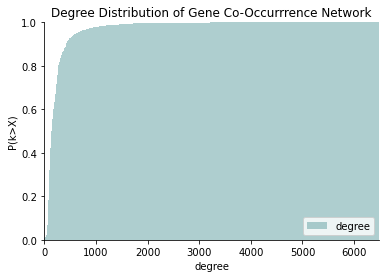

In [155]:
degs = [j for i,j in G_co.degree()]
plt.hist(degs , bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "cadetblue", label = "degree")
plt.xlim(left = 0, right = max(degs))
plt.ylim(top=1)
plt.xlabel("degree")
plt.ylabel("P(k>X)")
plt.title("Degree Distribution of Gene Co-Occurrrence Network")
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [118]:
print("mean degree:",G_co.size()*2/len(G_co.nodes()))

mean degree: 224.24147433689288


In [120]:
nx.write_gml(G_co, "networks/co_occurrence_graph_"+ str(gene_identifier), stringizer = str)

# Gene Dependency Network

In [121]:
G_dep = nx.DiGraph()

# add all edges
for i,j in G_co.edges():
    # if everytime i is in a genome so is j then i is dependent on j
    if G_co.edges[i,j]["weight"] == G_co.nodes[i]["count"]: # i is depe
        G_dep.add_edge(str(i),str(j))
        #print(i,"({})".format(G_co.nodes[i]["count"]),"depends on",j,"({})".format(G_co.nodes[j]["count"]))
    
    # if everytime j is in a genome so is i then j is dependent on i
    if G_co.edges[i,j]["weight"] == G_co.nodes[j]["count"]:
        G_dep.add_edge(str(j), str(i))
        #print(j ,"({})".format(G_co.nodes[j]["count"]),"depends on",i,"({})".format(G_co.nodes[i]["count"]))
        
# update node attributes
for i in G_co.nodes():
    if G_dep.has_node(i):
        G_dep.nodes[i]["temperate"] = G_co.nodes[i]["temperate"]
        G_dep.nodes[i]["count"] = G_co.nodes[i]["count"]


Look at centralities to see what genes are the most 'important' or have the most dependent genes

In [104]:
in_degree_centrality = nx.in_degree_centrality(G_dep)

In [82]:
{k: v for k, v in sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True)}

{38982: 0.19934810951760104,
 39535: 0.15567144719687093,
 37146: 0.11542807475010865,
 35250: 0.10751847023033465,
 3901: 0.10034767492394611,
 38697: 0.09960886571056063,
 39202: 0.09882659713168188,
 39436: 0.09882659713168188,
 8538: 0.09534984789222077,
 4690: 0.09322033898305085,
 20018: 0.09322033898305085,
 4397: 0.0900478053020426,
 36281: 0.08757062146892655,
 19645: 0.08683181225554107,
 33840: 0.08352890047805302,
 39207: 0.08157322903085615,
 32490: 0.08144285093437637,
 39578: 0.08022598870056498,
 20258: 0.07979139504563233,
 39091: 0.07953063885267275,
 10134: 0.07926988265971317,
 39482: 0.07883528900478053,
 36324: 0.07822685788787484,
 13325: 0.07779226423294221,
 13742: 0.07722729248152978,
 8900: 0.07461973055193394,
 4204: 0.07049109083007388,
 39511: 0.06836158192090395,
 10181: 0.06653628857018688,
 27102: 0.06627553237722729,
 39631: 0.06623207301173403,
 37284: 0.0655367231638418,
 8853: 0.06527596697088223,
 2976: 0.06527596697088223,
 39297: 0.06475445458496

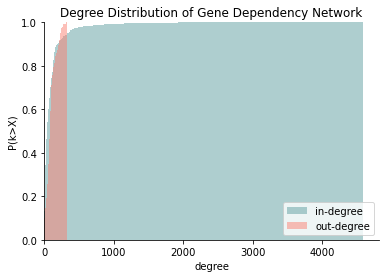

In [158]:
in_degs = [j for i,j in G_dep.in_degree()]
out_degs = [j for i,j in G_dep.out_degree()]
plt.hist(in_degs , bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "cadetblue", label = "in-degree")
plt.hist(out_degs, bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "salmon", label = "out-degree")
plt.xlim(left = 0)
plt.ylim(top=1)
plt.xlabel("degree")
plt.ylabel("P(k>X)")
plt.title("Degree Distribution of Gene Dependency Network")
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [160]:
print("mean degree:", np.mean(in_degs))
print("reciprocity:",nx.overall_reciprocity(G_dep))

mean degree: 91.44813350136891
reciprocity: 0.31716764568769


In [110]:
nx.write_gml(G_dep, "networks/dependency_graph_"+ str(gene_identifier), stringizer = str)

How are temperate phages dependency graphs different?